In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv(r"D:\Elevoo Tasks\Task #2\Mall_Customers.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [40]:
df.drop('CustomerID' , axis=1 , inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Annual Income (k$)'] = scaler.fit_transform(df[['Annual Income (k$)']])
scaler = MinMaxScaler()
df['Spending Score (1-100)'] = scaler.fit_transform(df[['Spending Score (1-100)']])

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

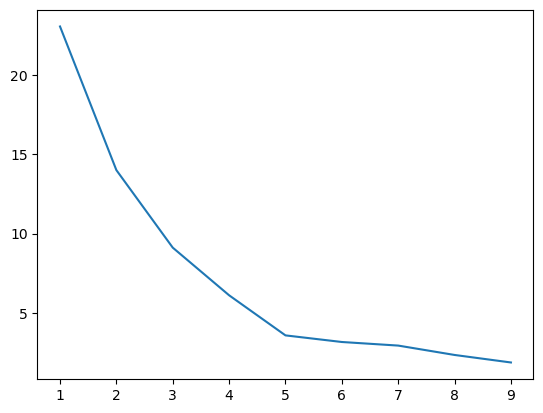

In [43]:
from sklearn.cluster import KMeans
sse = []
for i in range(1, 10):
    km = KMeans(n_clusters =  i)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(km.inertia_)
plt.plot(range(1,10), sse)
plt.show()

In [44]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(df[['Annual Income (k$)']])

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
df['cluster'] = y_pred

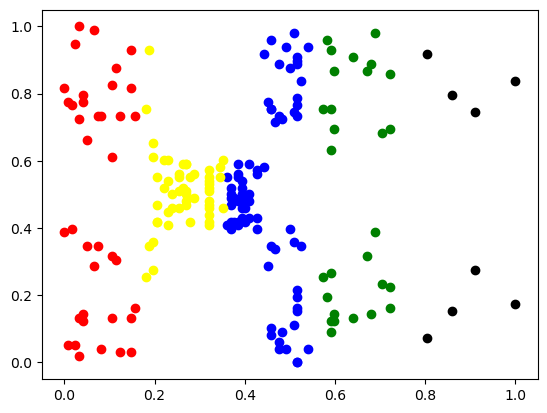

In [46]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
df4 = df[df['cluster'] == 3]
df5 = df[df['cluster'] == 4]



plt.scatter(df1['Annual Income (k$)'] , df1['Spending Score (1-100)'] , color = 'red')
plt.scatter(df2['Annual Income (k$)'] , df2['Spending Score (1-100)'] , color = 'blue')
plt.scatter(df3['Annual Income (k$)'] , df3['Spending Score (1-100)'] , color = 'green')
plt.scatter(df4['Annual Income (k$)'] , df4['Spending Score (1-100)'] , color = 'yellow')
plt.scatter(df5['Annual Income (k$)'] , df5['Spending Score (1-100)'] , color = 'black')
plt.show()
